In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import interp1d

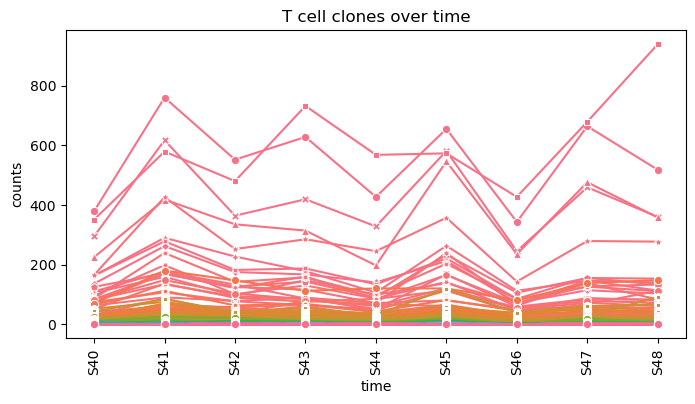

In [15]:
# Load the Excel file
sheet_index = 30
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S4').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]

# Add an ID column
tcr_counts['id'] = ['TCR' + str(i + 1) for i in range(len(tcr_counts))]

# Melt the dataframe for plotting
tcr_counts_m = tcr_counts.melt(id_vars='id', var_name='time', value_name='counts').copy()

# Set factor levels for 'variable'
tcr_counts_m['time'] = pd.Categorical(tcr_counts_m['time'], categories=[f'S{i}' for i in range(1, 51)], ordered=True)

# Plot 1: Stacked Bar Plot
#plt.figure(figsize=(10, 6))
#sns.barplot(data=tcr_counts_m, x='variable', y='value', hue='id')
#plt.xticks(rotation=90)
#plt.title('Stacked Bar Plot')
#plt.legend().remove()
#plt.show()

# Plot 2: Filled Bar Plot
#plt.figure(figsize=(10, 6))
#sns.histplot(data=tcr_counts_m, x='variable', weights='value', hue='id', multiple='fill', edgecolor='grey')
#plt.xticks(rotation=90)
#plt.title('Filled Bar Plot')
#plt.legend().remove()
#plt.show()

# Plot 3: Line Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=tcr_counts_m, x='time', y='counts', hue='id', style='id', markers=True, dashes=False)
plt.xticks(rotation=90)
plt.title('T cell clones over time')
plt.legend().remove()
plt.show()

In [32]:
#SARK012

sheet_index = 0
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

tcr_SARK012 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK012.index)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64')


In [33]:
#SARK018

sheet_index = 2
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK018 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK018.index)

S28    0
S29    0
S30    0
S31    0
S32    0
S33    0
S34    0
S35    0
S36    0
S37    0
S38    0
dtype: int64
S28    0
S29    0
S30    0
S31    0
S32    0
S33    0
S34    0
S35    0
S36    0
S37    0
S38    0
dtype: int64
(101, 11)
(101, 11)
S28    0
S29    0
S30    0
S31    0
S32    0
S33    0
S34    0
S35    0
S36    0
S37    0
S38    0
dtype: int64
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64')


In [34]:
#SARK019

sheet_index = 4
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK019 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK019.index)

S36    0
S37    0
S38    0
S40    0
S41    0
S42    0
S43    0
S44    0
S45    0
S46    0
S47    0
dtype: int64
S36    0
S37    0
S38    0
S40    0
S41    0
S42    0
S43    0
S44    0
S45    0
S46    0
S47    0
dtype: int64
(2539, 11)
(2539, 11)
S36    0
S37    0
S38    0
S40    0
S41    0
S42    0
S43    0
S44    0
S45    0
S46    0
S47    0
dtype: int64
Index([   1,    2,    0,    7,    3,    5,    4,    9,    6,   19,   10,   18,
          8,   13,   24,   28,   16,   34,   12,   17,   22,   35,   15,   30,
        207,   20,   39,   76,  679,   33,   42,   50,   63,  130,  133,  182,
        509, 2245, 2246,   21,   37,   57,   65,   70,   86,   87,  121,  123,
        124,  125,  162,  172,  238,  329,  348,  419,  446,  948,  993, 1182,
       1302, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254,   27,   32,   40,
         46,   47,   58,   61,   62,   68,   90,   99,  100,  103,  111,  117,
        137,  150,  154,  194,  195,  205,  211,  219,  225,  244,  246,  307,
        37

In [35]:
#SARK034

sheet_index = 6
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK034 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK034.index)

S2     0
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
S13    0
S14    0
S15    0
S16    0
S17    0
S18    0
S19    0
S20    0
S21    0
S22    0
S23    0
S24    0
S25    0
S26    0
S27    0
S28    0
S29    0
S30    0
S31    0
S32    0
S33    0
S34    0
S35    0
dtype: int64
S2     0
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
S13    0
S14    0
S15    0
S16    0
S17    0
S18    0
S19    0
S20    0
S21    0
S22    0
S23    0
S24    0
S25    0
S26    0
S27    0
S28    0
S29    0
S30    0
S31    0
S32    0
S33    0
S34    0
S35    0
dtype: int64
(22433, 34)
(22433, 34)
S2     0
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
S13    0
S14    0
S15    0
S16    0
S17    0
S18    0
S19    0
S20    0
S21    0
S22    0
S23    0
S24    0
S25    0
S26    0
S27    0
S28    0
S29    0
S30    0
S31    0
S32    0
S33    0
S34    0
S35    0
dtype: int64
Index([   0,    2, 

In [36]:
#SARK017

sheet_index = 8
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK017 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK017.index)

S21    0
S22    0
S23    0
S24    0
dtype: int64
S21    0
S22    0
S23    0
S24    0
dtype: int64
(605, 4)
(605, 4)
S21    0
S22    0
S23    0
S24    0
dtype: int64
Index([  1,   2,   0,  17,   3,   5,   7,   4,  14,  88,  21,  12,   6,  15,
        10,   8,   9,  11,  65,  18,  13,  24,  42,  59,  89,  90,  44,  83,
        91,  92,  93,  94,  95,  96,  97,  98,  99,  23,  29,  33,  36,  50,
        61,  72, 100, 101, 102, 103, 104, 105,  34,  52,  67, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,  16,  19,
        41,  48,  53,  70, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146],
      dtype='int64')


In [37]:
#SARK021

sheet_index = 10
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK021 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK021.index)

S25    0
S26    0
S27    0
S28    0
S29    0
S30    0
S31    0
S32    0
dtype: int64
S25    0
S26    0
S27    0
S28    0
S29    0
S30    0
S31    0
S32    0
dtype: int64
(924, 8)
(924, 8)
S25    0
S26    0
S27    0
S28    0
S29    0
S30    0
S31    0
S32    0
dtype: int64
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64')


In [38]:
#SARK025

sheet_index = 12
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK025 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK025.index)

S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
S13    0
S14    0
S15    0
S16    0
S17    0
S18    0
S19    0
S20    0
dtype: int64
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
S13    0
S14    0
S15    0
S16    0
S17    0
S18    0
S19    0
S20    0
dtype: int64
(14721, 20)
(14721, 20)
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
S13    0
S14    0
S15    0
S16    0
S17    0
S18    0
S19    0
S20    0
dtype: int64
Index([   0,    2,   11,    3,    5,   18,    4,    6,   20,  544,    1,   12,
        455, 1045, 2063,   13,  588, 6351,    8,   14,  130,  136,  369,  587,
        866, 1134, 1250, 1283, 3599, 3629, 5361, 6352, 6353, 6354, 6355, 6356,
       6357, 6358, 6359, 6360, 6361, 6362, 6363, 6364,    9,   17,   19,   53,
         57,   70,  138,  175,  196,  374,  495,  789,  827, 1004, 1084, 1545,
  

In [39]:
#SARK041

sheet_index = 14
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK041 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK041.index)

S33    0
S34    0
S35    0
S36    0
S37    0
S38    0
dtype: int64
S33    0
S34    0
S35    0
S36    0
S37    0
S38    0
dtype: int64
(699, 6)
(699, 6)
S33    0
S34    0
S35    0
S36    0
S37    0
S38    0
dtype: int64
Index([  0,   1,   2,   3,   6,   4,   5,   7,   8,   9,  26,  10,  12,  13,
        16,  27,  15,  20,  64,  69,  22,  17, 497,  21,  29,  44,  11,  18,
        30,  80, 170, 252,  35,  36,  47,  72,  93, 117, 129, 176, 229,  24,
        42, 228,  14,  19,  25,  33,  41,  54,  65, 141, 153, 162, 178, 259,
       522, 523,  23,  31,  32,  49,  85,  89, 110, 130, 187, 256, 260, 282,
       319, 386, 481, 524, 525, 526, 527,  37,  38,  51,  58,  61,  79,  87,
       102, 116, 147, 201, 254, 258, 285, 338, 383, 416, 428, 496, 528, 529,
       530, 531],
      dtype='int64')


In [40]:
#SARK011

sheet_index = 16
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK011 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK011.index)

S25    0
S26    0
S27    0
S28    0
S29    0
S30    0
S31    0
dtype: int64
S25    0
S26    0
S27    0
S28    0
S29    0
S30    0
S31    0
dtype: int64
(3121, 7)
(3121, 7)
S25    0
S26    0
S27    0
S28    0
S29    0
S30    0
S31    0
dtype: int64
Index([   0,    1,    2,    3,    5,    9,    4,   16,    6,   12,   18,   23,
         20,   24,   28,  124,   11,   29,   57,    8,   33,   68,   32,   52,
        226,  992,   22,   41,   73,  171,    7,   10,   26,   35,   36,   40,
         51,   91,   27,   39,   53,   62,  291,  956,   14,   15,   34,   54,
         79,   82,   85,  232,  272,  279, 1048,   13,   17,   19,   31,   38,
         47,   50,   59,   60,   61,   76,   77,   86,  109,  137,  150,  257,
        384,  418,  438,  787, 1154, 1405, 1406,   42,   72,   98,  119,  128,
        175,  192,  229,  489,  521,  536,  572,  638,  717,  725,  851,  855,
        867, 1034, 1243, 1326],
      dtype='int64')


In [41]:
#SARK027

sheet_index = 18
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK027 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK027.index)

S32    0
S33    0
S34    0
S35    0
S36    0
S37    0
dtype: int64
S32    0
S33    0
S34    0
S35    0
S36    0
S37    0
dtype: int64
(301, 6)
(301, 6)
S32    0
S33    0
S34    0
S35    0
S36    0
S37    0
dtype: int64
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64')


In [42]:
#SARK029

sheet_index = 20
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK029 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK029.index)

S38    0
S39    0
S40    0
S41    0
S42    0
dtype: int64
S38    0
S39    0
S40    0
S41    0
S42    0
dtype: int64
(357, 5)
(357, 5)
S38    0
S39    0
S40    0
S41    0
S42    0
dtype: int64
Index([  0,   3,   2,   4,   5,   1,   6,  11,   8,  14,  20,  13,   7,  45,
        53,  12,  24,  99,   9,  97,  17,  18,  52,  74,  23,  16,  33,  10,
        25,  29,  36,  58,  65,  88, 100, 117, 118, 119,  15,  19,  62,  70,
        95, 104, 120, 121, 122, 123, 124, 125,  21,  22,  34,  38,  39,  50,
        54,  72, 103, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160,  31,  35,  41,  47,
        49,  57],
      dtype='int64')


In [43]:
#SARK032

sheet_index = 22
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK032 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK032.index)

S43    0
S44    0
S45    0
S46    0
S47    0
dtype: int64
S43    0
S44    0
S45    0
S46    0
S47    0
dtype: int64
(1224, 5)
(1224, 5)
S43    0
S44    0
S45    0
S46    0
S47    0
dtype: int64
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64')


In [44]:
#SARK033

sheet_index = 24
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK033 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK033.index)

S11    0
S12    0
S13    0
S14    0
dtype: int64
S11    0
S12    0
S13    0
S14    0
dtype: int64
(258, 4)
(258, 4)
S11    0
S12    0
S13    0
S14    0
dtype: int64
Index([  0,   1,   2,   7,   5,   3,   6,   9,   4,  12,   8,  25,  17,  13,
        11,  15,  22,  10,  27,  21,  42,  14,  16,  33,  76,  18,  20,  23,
        24,  29,  34,  47,  51,  66,  82, 100, 130,  26,  28,  36,  88, 109,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148,  19,  30,  31,  43,  44,  46,  49,  52,  59,  70,
        77,  90,  93,  94, 105, 107, 115, 118, 124, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169],
      dtype='int64')


In [45]:
#SARK037

sheet_index = 26
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK037 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK037.index)

S15    0
S16    0
S17    0
S18    0
S19    0
S20    0
dtype: int64
S15    0
S16    0
S17    0
S18    0
S19    0
S20    0
dtype: int64
(683, 6)
(683, 6)
S15    0
S16    0
S17    0
S18    0
S19    0
S20    0
dtype: int64
Index([  0,   1,   2,   3,   5,   7,  12,   6,   4,  27,  86,  10,  19,  23,
       186, 219,   9,  29,  44,  90, 105, 220, 221,  21,  24,  31,  33,  41,
        53,  56,  57,  64,  69,  78,  84,  87, 147, 149, 184, 193, 217, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
       237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,   8,
        11,  13,  17,  18,  20,  26,  30,  40,  45,  65,  72,  73,  75,  81,
        82,  89,  98, 100, 103, 104, 112, 113, 119, 120, 122, 123, 159, 161,
       167, 176],
      dtype='int64')


In [46]:
#SARK052

sheet_index = 28
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK052 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK052.index)

S21    0
S22    0
S23    0
S24    0
dtype: int64
S21    0
S22    0
S23    0
S24    0
dtype: int64
(333, 4)
(333, 4)
S21    0
S22    0
S23    0
S24    0
dtype: int64
Index([ 1,  2,  7, 16, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,  0, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64')


In [47]:
#SARK059

sheet_index = 30
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')
tcr_df_freq = pd.read_excel(file_path, sheet_name=sheet_index+1, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])
tcr_df_freq = tcr_df_freq.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S').copy()
tcr_freq = tcr_df_freq.filter(regex='_S').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]
tcr_freq.columns = [col.split('_')[1] for col in tcr_freq.columns]

tcr_counts = tcr_counts[sorted(tcr_counts.columns, key=lambda x: int(x[1:]))]
tcr_freq = tcr_freq[sorted(tcr_freq.columns, key=lambda x: int(x[1:]))]

print(tcr_counts.isna().sum())
print(tcr_freq.isna().sum())
print(tcr_counts.shape)
print(tcr_freq.shape)

tcr_counts = tcr_counts.where(~(tcr_counts.isna() & (tcr_freq == 0)), 0)

print(tcr_counts.isna().sum())

tcr_SARK059 = tcr_counts.sort_values(by=tcr_counts.columns[0], ascending=False, kind="mergesort").head(100)
print(tcr_SARK059.index)

S1     0
S39    0
S40    0
S41    0
S42    0
S43    0
S44    0
S45    0
S46    0
S47    0
S48    0
dtype: int64
S1     0
S39    0
S40    0
S41    0
S42    0
S43    0
S44    0
S45    0
S46    0
S47    0
S48    0
dtype: int64
(825, 11)
(825, 11)
S1     0
S39    0
S40    0
S41    0
S42    0
S43    0
S44    0
S45    0
S46    0
S47    0
S48    0
dtype: int64
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64')


In [55]:
def interpolate_matrix(matrix, target_cols):
    matrix = matrix.values  # Convert DataFrame to NumPy array
    # Number of rows and current number of columns in the matrix
    rows, cols = matrix.shape
    
    # Generate the current column indices and the target column indices
    current_cols = np.arange(cols)
    target_cols_indices = np.linspace(0, cols-1, target_cols)
    
    # Interpolate each row
    interpolated_matrix = np.zeros((rows, target_cols))
    for i in range(rows):
        f = interp1d(current_cols, matrix[i], kind='linear', fill_value='extrapolate')
        interpolated_matrix[i] = f(target_cols_indices)
    
    return interpolated_matrix

(100, 7)
(100, 16)


In [65]:
def plotting_matrix(ax, matrix, title):
    rows, cols = matrix.shape
    x_values = np.arange(cols)  # X-axis: column indices (interpolated points)
    
    # Plot each row as a separate line
    for i in range(rows):
        ax.plot(x_values, matrix[i], alpha=0.6)

    ax.set_xlabel("Time")
    ax.set_ylabel("Values")
    ax.set_title(title)
    ax.grid(True)

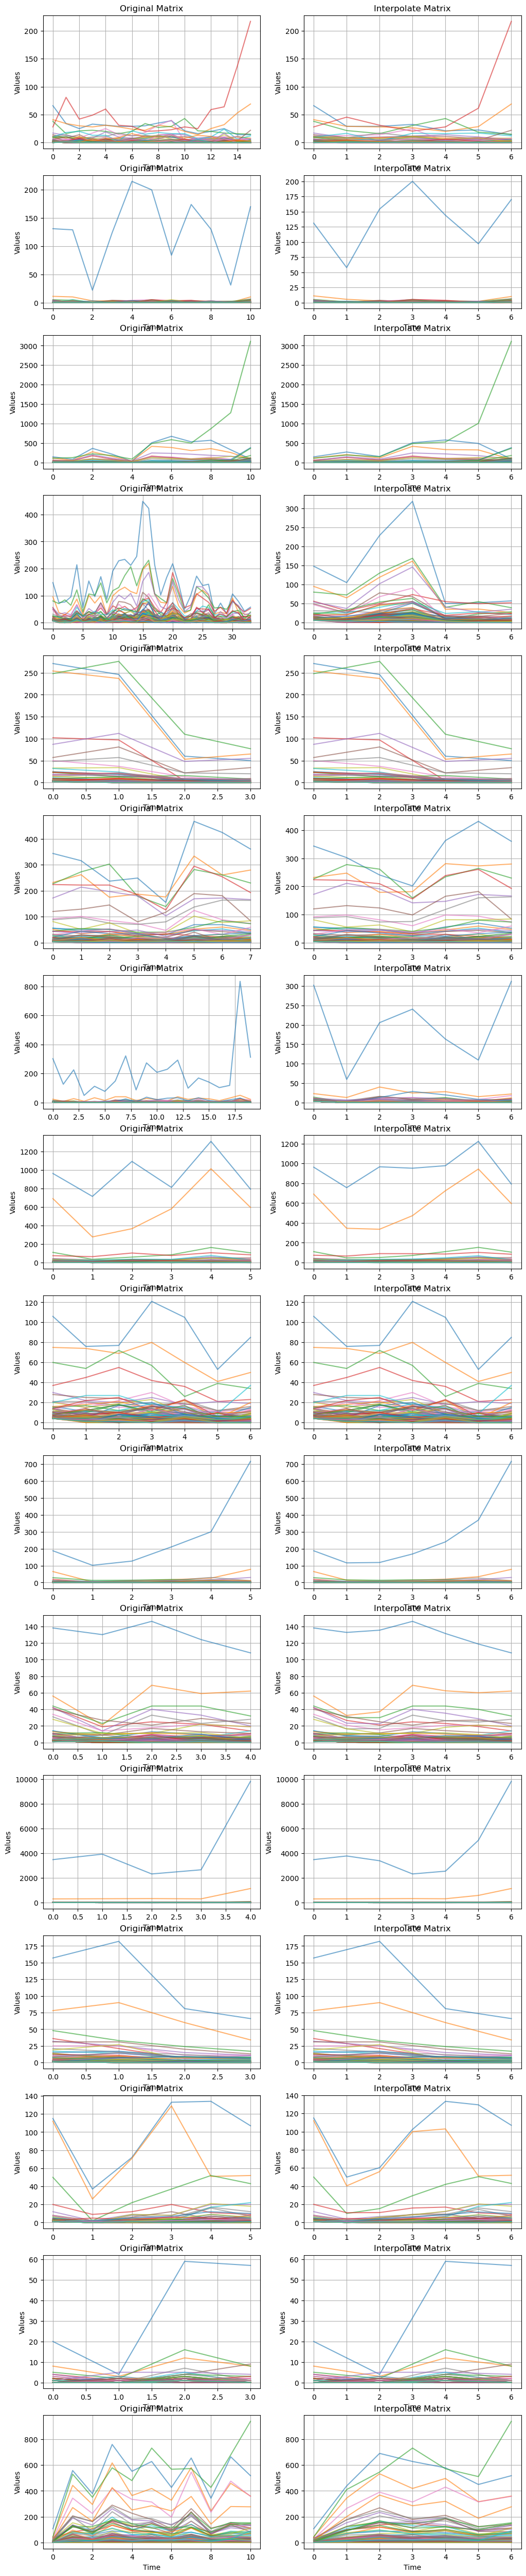

In [67]:
interp_SARK012 = interpolate_matrix(tcr_SARK012, 7)
interp_SARK018 = interpolate_matrix(tcr_SARK018, 7)
interp_SARK019 = interpolate_matrix(tcr_SARK019, 7)
interp_SARK034 = interpolate_matrix(tcr_SARK034, 7)
interp_SARK017 = interpolate_matrix(tcr_SARK017, 7)
interp_SARK021 = interpolate_matrix(tcr_SARK021, 7)
interp_SARK025 = interpolate_matrix(tcr_SARK025, 7)
interp_SARK041 = interpolate_matrix(tcr_SARK041, 7)
interp_SARK011 = interpolate_matrix(tcr_SARK011, 7)
interp_SARK027 = interpolate_matrix(tcr_SARK027, 7)
interp_SARK029 = interpolate_matrix(tcr_SARK029, 7)
interp_SARK032 = interpolate_matrix(tcr_SARK032, 7)
interp_SARK033 = interpolate_matrix(tcr_SARK033, 7)
interp_SARK037 = interpolate_matrix(tcr_SARK037, 7)
interp_SARK052 = interpolate_matrix(tcr_SARK052, 7)
interp_SARK059 = interpolate_matrix(tcr_SARK059, 7)

#plotting
fig, axes = plt.subplots(16, 2, figsize=(12, 64))

plotting_matrix(axes[0, 0], tcr_SARK012.values, "Original Matrix")
plotting_matrix(axes[0, 1], interp_SARK012, "Interpolate Matrix")
plotting_matrix(axes[1, 0], tcr_SARK018.values, "Original Matrix")
plotting_matrix(axes[1, 1], interp_SARK018, "Interpolate Matrix")
plotting_matrix(axes[2, 0], tcr_SARK019.values, "Original Matrix")
plotting_matrix(axes[2, 1], interp_SARK019, "Interpolate Matrix")
plotting_matrix(axes[3, 0], tcr_SARK034.values, "Original Matrix")
plotting_matrix(axes[3, 1], interp_SARK034, "Interpolate Matrix")
plotting_matrix(axes[4, 0], tcr_SARK017.values, "Original Matrix")
plotting_matrix(axes[4, 1], interp_SARK017, "Interpolate Matrix")
plotting_matrix(axes[5, 0], tcr_SARK021.values, "Original Matrix")
plotting_matrix(axes[5, 1], interp_SARK021, "Interpolate Matrix")
plotting_matrix(axes[6, 0], tcr_SARK025.values, "Original Matrix")
plotting_matrix(axes[6, 1], interp_SARK025, "Interpolate Matrix")
plotting_matrix(axes[7, 0], tcr_SARK041.values, "Original Matrix")
plotting_matrix(axes[7, 1], interp_SARK041, "Interpolate Matrix")
plotting_matrix(axes[8, 0], tcr_SARK011.values, "Original Matrix")
plotting_matrix(axes[8, 1], interp_SARK011, "Interpolate Matrix")
plotting_matrix(axes[9, 0], tcr_SARK027.values, "Original Matrix")
plotting_matrix(axes[9, 1], interp_SARK027, "Interpolate Matrix")
plotting_matrix(axes[10, 0], tcr_SARK029.values, "Original Matrix")
plotting_matrix(axes[10, 1], interp_SARK029, "Interpolate Matrix")
plotting_matrix(axes[11, 0], tcr_SARK032.values, "Original Matrix")
plotting_matrix(axes[11, 1], interp_SARK032, "Interpolate Matrix")
plotting_matrix(axes[12, 0], tcr_SARK033.values, "Original Matrix")
plotting_matrix(axes[12, 1], interp_SARK033, "Interpolate Matrix")
plotting_matrix(axes[13, 0], tcr_SARK037.values, "Original Matrix")
plotting_matrix(axes[13, 1], interp_SARK037, "Interpolate Matrix")
plotting_matrix(axes[14, 0], tcr_SARK052.values, "Original Matrix")
plotting_matrix(axes[14, 1], interp_SARK052, "Interpolate Matrix")
plotting_matrix(axes[15, 0], tcr_SARK059.values, "Original Matrix")
plotting_matrix(axes[15, 1], interp_SARK059, "Interpolate Matrix")